# Importing libraries

In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing files

In [2]:
path_fao = "FAO.csv"
path_food_prod = "Food_Production.csv"

df_fao = pd.read_csv(path_fao, encoding='latin-1')
df_food_prod = pd.read_csv(path_food_prod, encoding='latin-1')

# Combining dataframes

In [3]:
# Mapping values of 'Food product' and 'Item'
mapping = {
    'Wheat and products': 'Wheat & Rye (Bread)',
    'Rice (Milled Equivalent)': 'Rice',
    'Barley and products': 'Barley (Beer)',
    'Maize and products': 'Maize (Meal)',
    'Oats': 'Oatmeal',
    'Potatoes and products': 'Potatoes',
    'Cassava and products': 'Cassava',
    'Sugar cane': 'Cane Sugar',
    'Sugar beet': 'Beet Sugar',
    'Pulses, Other and products': 'Other Pulses',
    'Peas': 'Peas',
    'Nuts and products': 'Nuts',
    'Groundnuts (Shelled Eq)': 'Groundnuts',
    'Soyabean Oil': 'Soybean Oil',
    'Palm Oil': 'Palm Oil',
    'Sunflowerseed Oil': 'Sunflower Oil',
    'Rape and Mustard Oil': 'Rapeseed Oil',
    'Olive Oil': 'Olive Oil',
    'Tomatoes and products': 'Tomatoes',
    'Onions': 'Onions & Leeks',
    'Roots, Other': 'Root Vegetables',
    'Vegetables, Other': 'Other Vegetables',
    'Oranges, Mandarines': 'Citrus Fruit',
    'Bananas': 'Bananas',
    'Apples and products': 'Apples',
    'Grapes and products (excl wine)': 'Berries & Grapes',
    'Wine': 'Wine',
    'Fruits, Other': 'Other Fruit',
    'Coffee and products': 'Coffee',
    'Cocoa Beans and products': 'Dark Chocolate',
    'Bovine Meat': 'Beef (beef herd)',
    'Mutton & Goat Meat': 'Lamb & Mutton',
    'Pigmeat': 'Pig Meat',
    'Poultry Meat': 'Poultry Meat',
    'Milk - Excluding Butter': 'Milk',
    'Cheese': 'Cheese',
    'Eggs': 'Eggs',
    'Freshwater Fish': 'Fish (farmed)',
    'Crustaceans': 'Shrimps (farmed)'
}

# Combining the dataframes
df_fao['Food product'] = df_fao['Item'].map(mapping)
df_combined = df_fao.merge(df_food_prod, on='Food product', how='left')


# Cleaning the dataset

In [4]:
# Keeping useful features
useful_features = ['Area Abbreviation', 'Area', 'Food product', 'Element', 'Unit', 'Total_emissions', 'Y1961', 
                   'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 
                   'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 
                   'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
                   'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
                   'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
                   'Y2012', 'Y2013']
                   
df_combined = df_combined[useful_features]

# Dropping NaN values
df_combined.dropna(inplace=True)

# Calculating total production and emissions produced

In [5]:
# Calculating total production
df_combined['Total Production'] = df_combined.loc[:, 'Y1961':'Y2013'].sum(axis=1)

# Calculating total emission
df_combined['Total Emission Produced'] = df_combined['Total Production'] * df_combined['Total_emissions']

# Grouping by country

In [6]:
# Grouping by country
df_country = df_combined.groupby(['Area','Area Abbreviation', 'Element'])['Total Emission Produced'].sum().reset_index()

# Creating the proportion df
df_country_proportion = df_country.pivot_table(index=['Area','Area Abbreviation'], columns='Element', values='Total Emission Produced', fill_value=0)
print(df_country_proportion)
# Calculating the food to feed ratio
df_country_proportion['Total'] = df_country_proportion['Food'] + df_country_proportion['Feed']
df_country_proportion['Food Proportion'] = df_country_proportion['Food'] / df_country_proportion['Total']
df_country_proportion['Feed Proportion'] = df_country_proportion['Feed'] / df_country_proportion['Total']

Element                                                   Feed       Food
Area                               Area Abbreviation                     
Afghanistan                        AFG                 41770.3  1104676.6
Albania                            ALB                 22952.1   356230.7
Algeria                            DZA                 72585.7  1891552.5
Angola                             AGO                 64438.3   594052.5
Antigua and Barbuda                ATG                    23.7     7589.6
...                                                        ...        ...
Venezuela (Bolivarian Republic of) VEN                 36853.4  2365885.7
Viet Nam                           VNM                328836.3  3743261.3
Yemen                              YEM                  5206.1   563808.0
Zambia                             ZMB                  3018.9   320143.1
Zimbabwe                           ZWE                 17140.4   452555.2

[146 rows x 2 columns]


# Grouping by food product

In [7]:
# Grouping by food product
df_food = df_combined.groupby(['Food product', 'Element'])['Total Emission Produced'].sum().reset_index()

# Creating the proportion df
df_food_proportion = df_food.pivot_table(index='Food product', columns='Element', values='Total Emission Produced', fill_value=0)

# Calculating the food to feed ratio
df_food_proportion['Total'] = df_food_proportion['Food'] + df_food_proportion['Feed']
df_food_proportion['Food Proportion'] = df_food_proportion['Food'] / df_food_proportion['Total']
df_food_proportion['Feed Proportion'] = df_food_proportion['Feed'] / df_food_proportion['Total']


# Grouping by continent

In [8]:
# Mapping countries to continents
continent_mapping = {
    'AFG': 'Asia',
    'ALB': 'Europe',
    'DZA': 'Africa',
    'AND': 'Europe',
    'AGO': 'Africa',
    'ATG': 'North America',
    'ARG': 'South America',
    'ARM': 'Asia',
    'AUS': 'Oceania',
    'AUT': 'Europe',
    'AZE': 'Asia',
    'BHS': 'North America',
    'BHR': 'Asia',
    'BGD': 'Asia',
    'BRB': 'North America',
    'BLR': 'Europe',
    'BEL': 'Europe',
    'BLZ': 'North America',
    'BEN': 'Africa',
    'BTN': 'Asia',
    'BOL': 'South America',
    'BIH': 'Europe',
    'BWA': 'Africa',
    'BRA': 'South America',
    'BRN': 'Asia',
    'BGR': 'Europe',
    'BFA': 'Africa',
    'BDI': 'Africa',
    'CPV': 'Africa',
    'KHM': 'Asia',
    'CMR': 'Africa',
    'CAN': 'North America',
    'CAF': 'Africa',
    'TCD': 'Africa',
    'CHL': 'South America',
    'CHN': 'Asia',
    'COL': 'South America',
    'COM': 'Africa',
    'COG': 'Africa',
    'CRI': 'North America',
    'CIV': 'Africa',
    'HRV': 'Europe',
    'CUB': 'North America',
    'CYP': 'Asia',
    'CZE': 'Europe',
    'DNK': 'Europe',
    'DJI': 'Africa',
    'DMA': 'North America',
    'DOM': 'North America',
    'TLS': 'Asia',
    'ECU': 'South America',
    'EGY': 'Africa',
    'SLV': 'North America',
    'GNQ': 'Africa',
    'ERI': 'Africa',
    'EST': 'Europe',
    'SWZ': 'Africa',
    'ETH': 'Africa',
    'FJI': 'Oceania',
    'FIN': 'Europe',
    'FRA': 'Europe',
    'GAB': 'Africa',
    'GMB': 'Africa',
    'GEO': 'Asia',
    'DEU': 'Europe',
    'GHA': 'Africa',
    'GRC': 'Europe',
    'GRD': 'North America',
    'GTM': 'North America',
    'GIN': 'Africa',
    'GNB': 'Africa',
    'GUY': 'South America',
    'HTI': 'North America',
    'HND': 'North America',
    'HUN': 'Europe',
    'ISL': 'Europe',
    'IND': 'Asia',
    'IDN': 'Asia',
    'IRN': 'Asia',
    'IRQ': 'Asia',
    'IRL': 'Europe',
    'ISR': 'Asia',
    'ITA': 'Europe',
    'JAM': 'North America',
    'JPN': 'Asia',
    'JOR': 'Asia',
    'KAZ': 'Asia',
    'KEN': 'Africa',
    'KIR': 'Oceania',
    'PRK': 'Asia',
    'KOR': 'Asia',
    'KWT': 'Asia',
    'KGZ': 'Asia',
    'LAO': 'Asia',
    'LVA': 'Europe',
    'LBN': 'Asia',
    'LSO': 'Africa',
    'LBR': 'Africa',
    'LBY': 'Africa',
    'LIE': 'Europe',
    'LTU': 'Europe',
    'LUX': 'Europe',
    'MDG': 'Africa',
    'MWI': 'Africa',
    'MYS': 'Asia',
    'MDV': 'Asia',
    'MLI': 'Africa',
    'MLT': 'Europe',
    'MHL': 'Oceania',
    'MRT': 'Africa',
    'MUS': 'Africa',
    'MEX': 'North America',
    'FSM': 'Oceania',
    'MDA': 'Europe',
    'MCO': 'Europe',
    'MNG': 'Asia',
    'MNE': 'Europe',
    'MAR': 'Africa',
    'MOZ': 'Africa',
    'MMR': 'Asia',
    'NAM': 'Africa',
    'NRU': 'Oceania',
    'NPL': 'Asia',
    'NLD': 'Europe',
    'NZL': 'Oceania',
    'NIC': 'North America',
    'NER': 'Africa',
    'NGA': 'Africa',
    'MKD': 'Europe',
    'NOR': 'Europe',
    'OMN': 'Asia',
    'PAK': 'Asia',
    'PLW': 'Oceania',
    'PAN': 'North America',
    'PNG': 'Oceania',
    'PRY': 'South America',
    'PER': 'South America',
    'PHL': 'Asia',
    'POL': 'Europe',
    'PRT': 'Europe',
    'QAT': 'Asia',
    'ROU': 'Europe',
    'RUS': 'Europe',
    'RWA': 'Africa',
    'KNA': 'North America',
    'LCA': 'North America',
    'VCT': 'North America',
    'WSM': 'Oceania',
    'SMR': 'Europe',
    'STP': 'Africa',
    'SAU': 'Asia',
    'SEN': 'Africa',
    'SRB': 'Europe',
    'SYC': 'Africa',
    'SLE': 'Africa',
    'SGP': 'Asia',
    'SVK': 'Europe',
    'SVN': 'Europe',
    'SLB': 'Oceania',
    'SOM': 'Africa',
    'ZAF': 'Africa',
    'SSD': 'Africa',
    'ESP': 'Europe',
    'LKA': 'Asia',
    'SDN': 'Africa',
    'SUR': 'South America',
    'SWE': 'Europe',
    'CHE': 'Europe',
    'SYR': 'Asia',
    'TJK': 'Asia',
    'TZA': 'Africa',
    'THA': 'Asia',
    'TGO': 'Africa',
    'TON': 'Oceania',
    'TTO': 'North America',
    'TUN': 'Africa',
    'TUR': 'Asia',
    'TKM': 'Asia',
    'TUV': 'Oceania',
    'UGA': 'Africa',
    'UKR': 'Europe',
    'ARE': 'Asia',
    'GBR': 'Europe',
    'USA': 'North America',
    'URY': 'South America',
    'UZB': 'Asia',
    'VUT': 'Oceania',
    'VEN': 'South America',
    'VNM': 'Asia',
    'YEM': 'Asia',
    'ZMB': 'Africa',
    'ZWE': 'Africa',
}

continent_df = df_country
continent_df['Continent'] = continent_df['Area Abbreviation'].map(continent_mapping)
grouped_continent = continent_df.groupby('Continent').sum()
piv_df = continent_df.pivot_table(index='Continent',columns='Element', values='Total Emission Produced', aggfunc='sum')
piv_df['Feed Ratio'] = piv_df['Feed']/piv_df['Feed'].sum()
piv_df['Food Ratio'] = piv_df['Food']/piv_df['Food'].sum()

# Calculating emission produced per year

In [9]:
# Calculating emission produced
df_emission = df_combined.iloc[:, 6:-2].multiply(df_combined['Total_emissions'], axis=0)

# Calculating yearly emission
yearly_totals = df_emission.sum()


# Plots

## Food to feed production per country

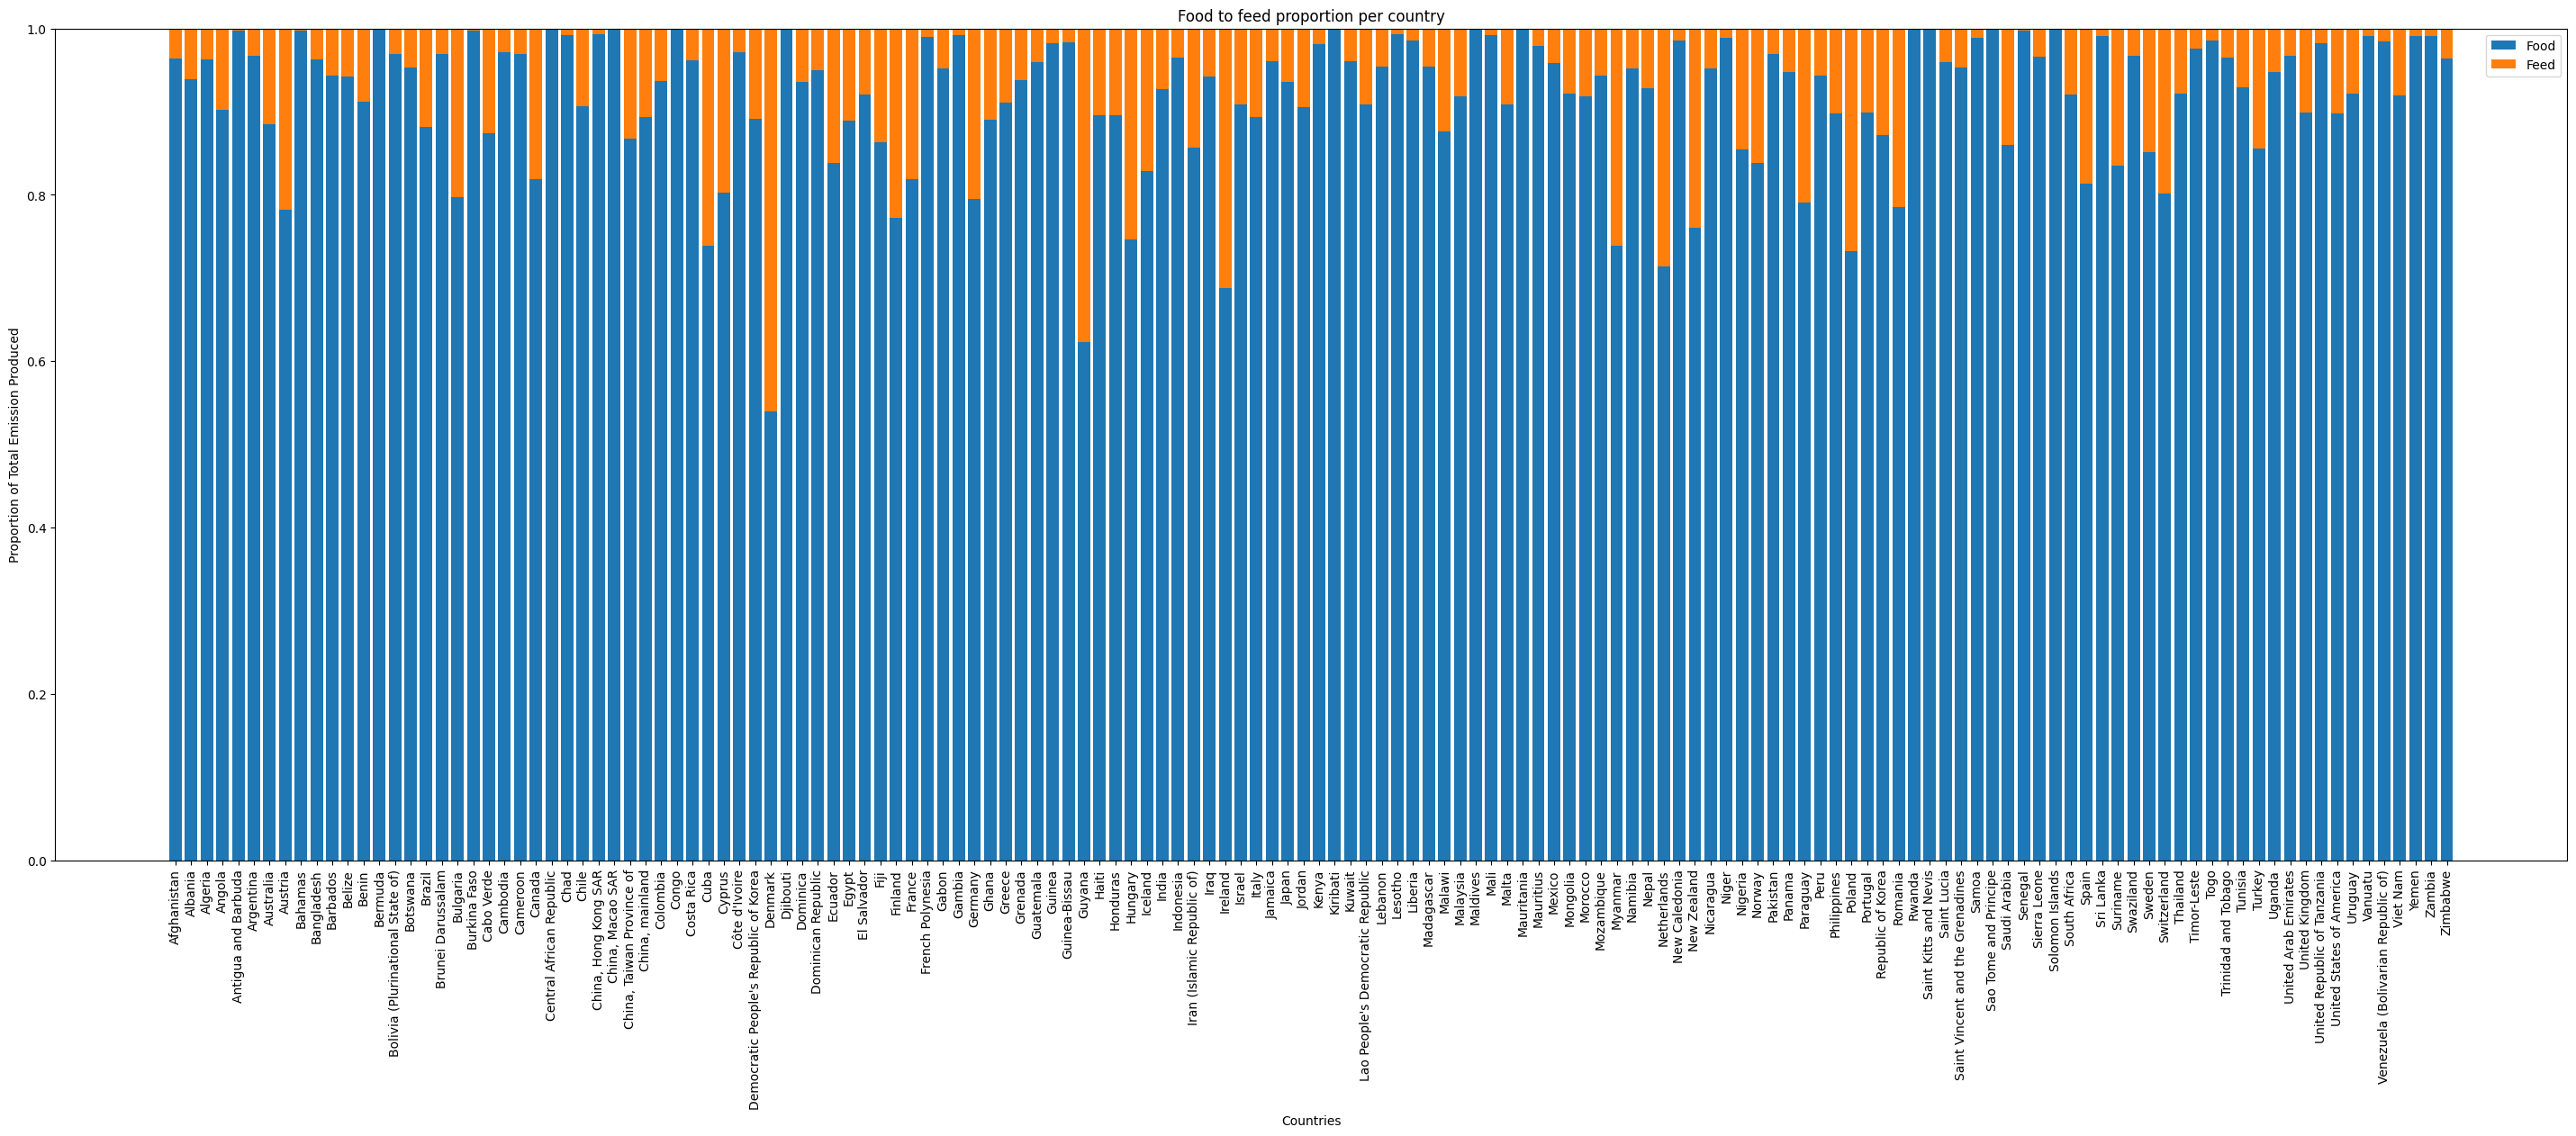

In [26]:
plt.figure(figsize=(36, 12))

# Extract the first element of each tuple in the index
index_first_elements = [index_tuple[0] for index_tuple in df_country_proportion.index]

plt.bar(index_first_elements, df_country_proportion['Food Proportion'], label='Food')
plt.bar(index_first_elements, df_country_proportion['Feed Proportion'], bottom=df_country_proportion['Food Proportion'], label='Feed')

# Customize the chart
plt.title('Food to feed proportion per country')
plt.xlabel('Countries')
plt.ylabel('Proportion of Total Emission Produced')
plt.xticks(rotation=90)
plt.legend()

plt.show()

# Food and Feed Ratio per continent

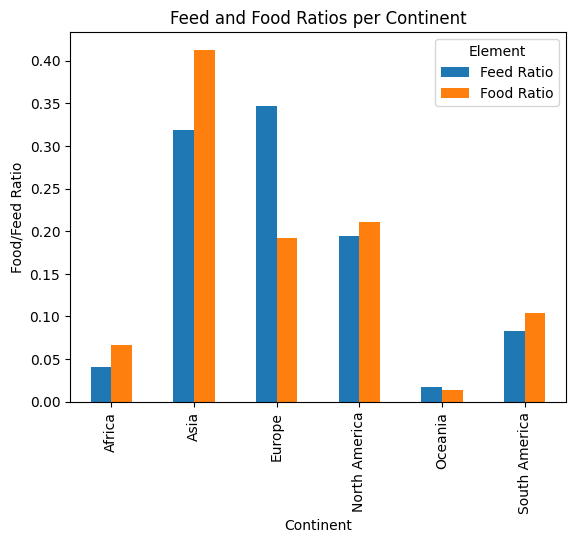

In [17]:
piv_df[['Feed Ratio','Food Ratio']].plot(kind='bar')
plt.title('Feed and Food Ratios per Continent')
plt.xlabel('Continent')
plt.ylabel('Food/Feed Ratio')
# Show the plot
plt.show()

# CO2 total emissions per continent

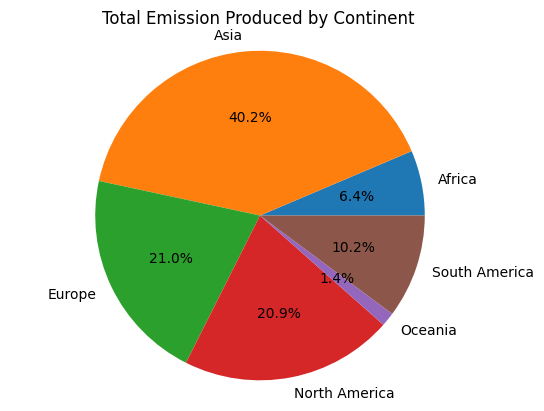

In [18]:
plt.pie(grouped_continent['Total Emission Produced'],labels=grouped_continent.index, autopct='%1.1f%%')
plt.title('Total Emission Produced by Continent')
plt.axis('equal')
plt.show()

# Food to feed production per food product

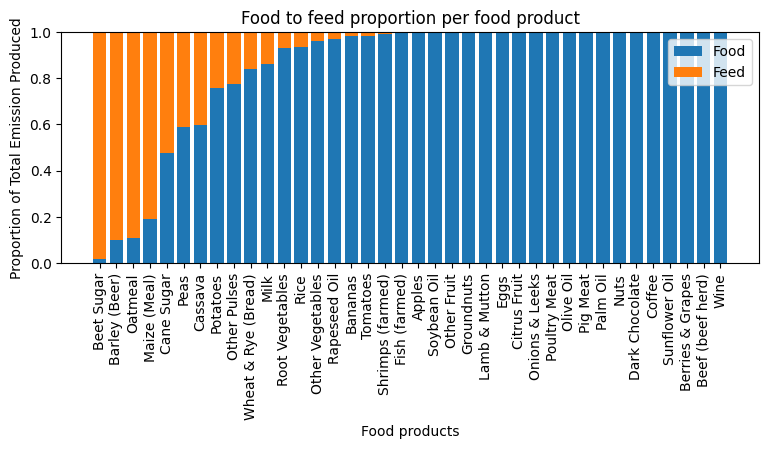

In [19]:
plt.figure(figsize=(9, 3))

# Sorting by descending feed proportion
df_food_proportion_sorted = df_food_proportion.sort_values('Feed Proportion', ascending=False)
plt.bar(df_food_proportion_sorted.index, df_food_proportion_sorted['Food Proportion'], label='Food')
plt.bar(df_food_proportion_sorted.index, df_food_proportion_sorted['Feed Proportion'], bottom=df_food_proportion_sorted['Food Proportion'], label='Feed')

# Customize the chart
plt.title('Food to feed proportion per food product')
plt.xlabel('Food products')
plt.ylabel('Proportion of Total Emission Produced')
plt.xticks(rotation=90)
plt.legend()

plt.show()

## Yearly emission trend

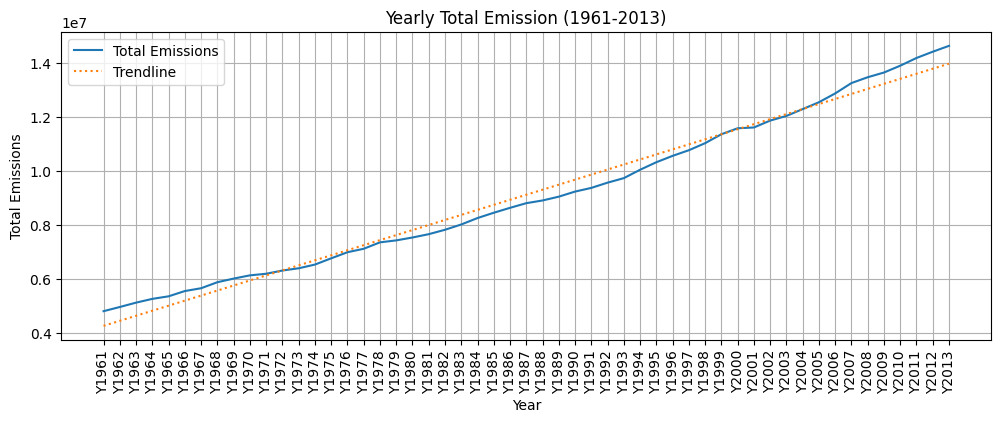

In [20]:
# Obtain year from string values
x = np.array([int(i[1:]) for i in yearly_totals.index])

# Fitting linear regression model
y = yearly_totals.values
slope, intercept = np.polyfit(x, y, 1)
trendline_values = (slope * x) + intercept

# Plotting the trend
plt.figure(figsize=(12, 4))
plt.plot(yearly_totals.index, yearly_totals.values, label='Total Emissions')
plt.plot(yearly_totals.index, trendline_values, linestyle='dotted', label='Trendline')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Yearly Total Emission (1961-2013)')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()


# Forecasted Trends using ARIMA

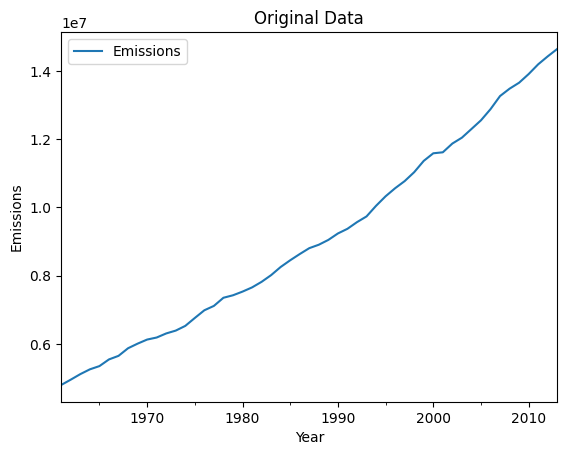

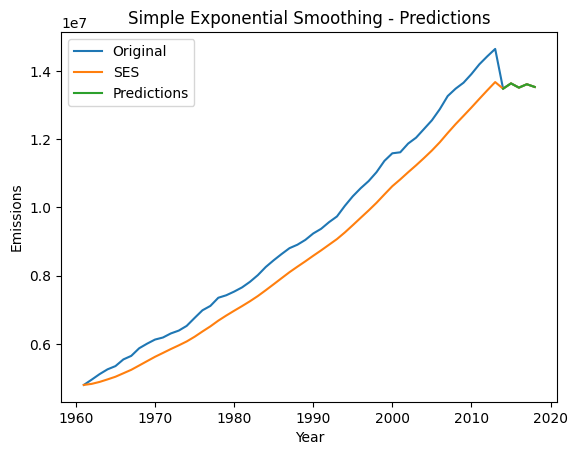

In [21]:
from statsmodels.tsa.arima.model import ARIMA
emissions_df = pd.DataFrame(yearly_totals,columns=['Emissions'])
emissions_diff = emissions_df['Emissions'].diff().dropna()

# Convert index to datetime type
emissions_df.index = pd.to_datetime(emissions_df.index.str[1:], format='%Y')
emissions_df.index = pd.to_datetime(emissions_df.index)
df = pd.DataFrame(emissions_df, index=pd.date_range('1961-01-01', periods=len(emissions_df), freq='AS'))
# Plot the original data
df.plot()
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Original Data')
plt.show()
# Implement Simple Exponential Smoothing
alpha = 0.2  # Smoothing factor (0 <= alpha <= 1)
df['SES'] = df['Emissions'].ewm(alpha=alpha, adjust=False).mean()
# Predict for the years 2014-2018
start_year = 2014
end_year = 2018
for year in range(start_year, end_year+1):
    last_value = df['SES'].iloc[-1]
    prediction = alpha * last_value + (1 - alpha) * df['SES'].iloc[-2]
    df.loc[pd.to_datetime(str(year))] = prediction

# Plot the original data, SES, and predictions
plt.plot(df['Emissions'], label='Original')
plt.plot(df['SES'], label='SES')
plt.plot(df['SES'].loc['2014':'2018'], label='Predictions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Simple Exponential Smoothing - Predictions')
plt.legend()
plt.show()

# World heatmap representation

In [16]:
import fiona; fiona.supported_drivers
fiona.supported_driver["NAS"] = "raw"
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_geography_regions_polys.geojson"

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/toyesh/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/yn/fwm7ln096_x6h9t9cp0b0xgh0000gn/T/ipykernel_40582/2804529715.py", line 1, in <module>
    import fiona; fiona.supported_drivers
ModuleNotFoundError: No module named 'fiona'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/toyesh/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/toyesh/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/toyesh/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1006, in structured_traceback
   